## Wall Cutoff Exploration
**Ashley Ferreira, November 2023**

In this notebook, we load in a combined file of electron and muon events that have no cutoff based on distance to the wall. 

We are interested in figuring out how close events can be to the wall to give us a signal that is realistic enough to infer something about the event. 

In this notebook, we are looking at the number of PMTs that light up as a way to figure out when we transition from the just dark noise regime to a regime where we get actual signal from the events. The distance to the wall is also not explicitly available from the detector data (we currently use FiTQun to get it) but the number of PMTs that light up is easily available, so we can use these results to make the cutoff based on number of PMTs.

In [1]:
from plot_pmts import plot_vs_walls, plot_indiv_event
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# what file to read in events from
input_path = '/fast_scratch/WatChMaL/data/T2K/sep22_emu_2BugFixes_0dwallCut_1M_1/combine_combine.hy'

# what directory to output plots to (only if save_plots = True)
output_dir = '/fast_scratch_2/aferreira/t2k/ml/analysis_plots/'

ModuleNotFoundError: No module named 'plot_pmts'

#### Distance to Wall versus Number of PMTs

In [2]:
wall, towall, num_pmt, label = plot_walls(input_path, output_dir, text_file=False, save_plots=False)

Getting data from: /fast_scratch/WatChMaL/data/T2K/sep22_emu_2BugFixes_0dwallCut_1M_1/combine_combine.hy


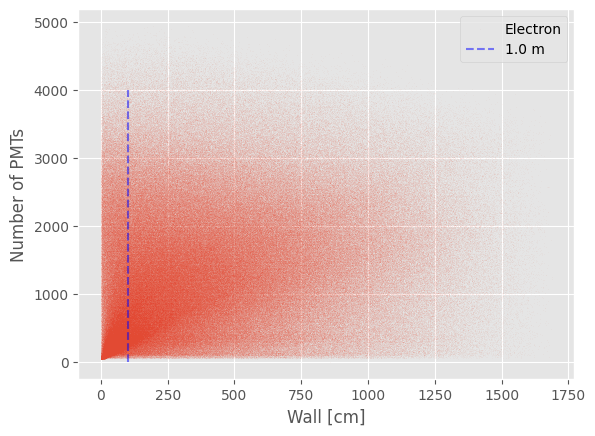

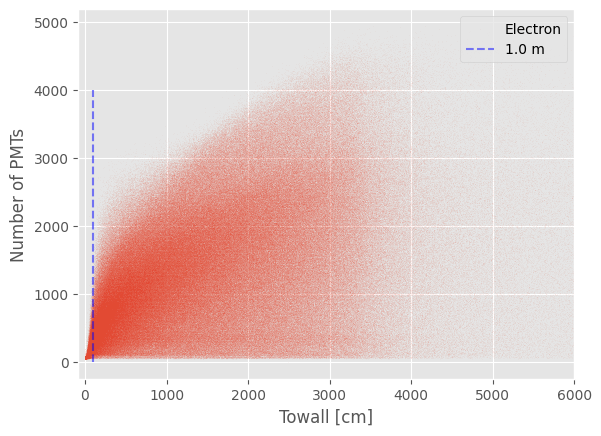

In [3]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
ax1.scatter(wall, num_pmt, alpha=0.1, s=0.01, label=label)
ax2.scatter(towall, num_pmt, alpha=0.1, s=0.01, label=label)

# make the 2m cutoff line go up to 4000
y_max = 4000
nominal_cutoff = 100

# add labels and stuff to make plots more understandable
ax1.vlines(nominal_cutoff, ymin=0, ymax=y_max, linestyles='--', label=f'{nominal_cutoff/100} m', color='blue', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')

ax2.vlines(nominal_cutoff, ymin=0, ymax=y_max, linestyles='--', label=f'{nominal_cutoff/100} m', color='blue', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
ax2.set_xlim(-80,6000) # some anomolous points way too far out exist

fig1.show()
fig2.show()

Note that both of these have a different x-axis. Now lets zoom in and keep the x-axis the same between both...

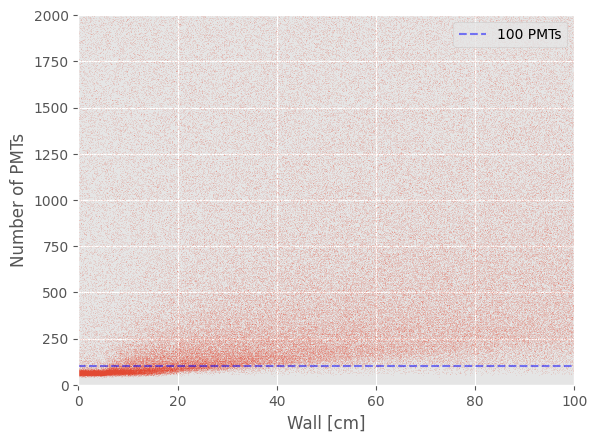

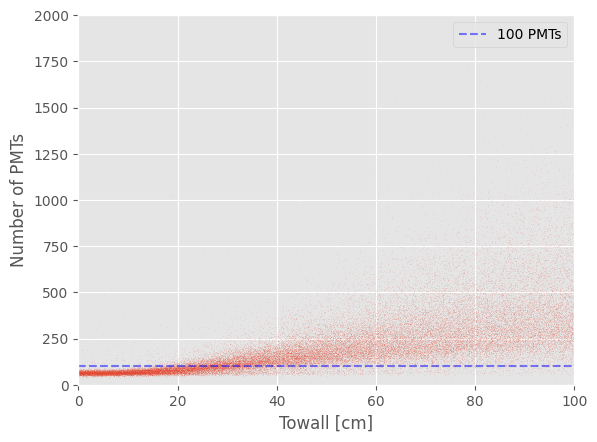

In [4]:
zoom_x, zoom_y = 100, 2000
dark_noise_level = 100

# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons

# maybe sifen them off by label
ax1.scatter(wall, num_pmt, alpha=0.3, s=0.01)
ax2.scatter(towall, num_pmt, alpha=0.3, s=0.01)

# add labels and stuff to make plots more understandable
ax1.hlines(dark_noise_level, xmin=0, xmax=zoom_x, linestyles='--', label=f'{dark_noise_level} PMTs', color='blue', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')

ax2.hlines(dark_noise_level, xmin=0, xmax=zoom_x, linestyles='--', label=f'{dark_noise_level} PMTs', color='blue', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')

ax1.set_xlim(0,zoom_x)
ax2.set_xlim(0,zoom_x) 

ax1.set_ylim(0,zoom_y)
ax2.set_ylim(0,zoom_y) 

fig1.show()
fig2.show()


Vertical line is set at 100 PMTs, this is probably some indication of the dark noise level. So perhaps we could use a cut off of 100 PMTs lighting up opposed to a towall of 100 cm. Lets just zoom in one more time...

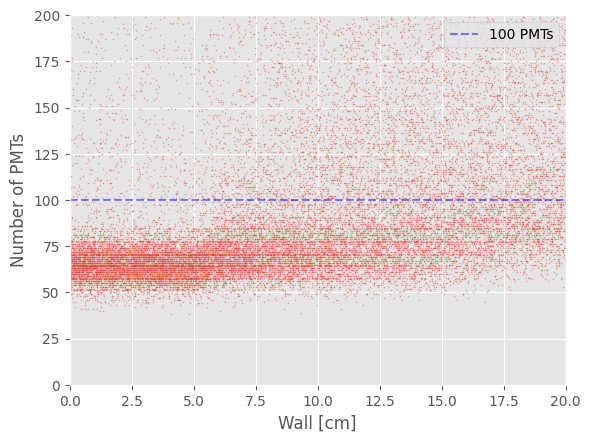

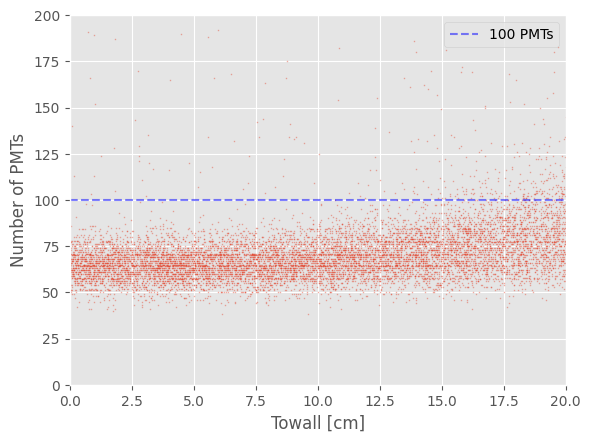

In [5]:
zoom_x, zoom_y = 20, 200
dark_noise_level = 100

# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons

# maybe sifen them off by label
ax1.scatter(wall, num_pmt, alpha=0.3, s=0.5)
ax2.scatter(towall, num_pmt, alpha=0.3, s=0.5)

# add labels and stuff to make plots more understandable
ax1.hlines(dark_noise_level, xmin=0, xmax=zoom_x, linestyles='--', label=f'{dark_noise_level} PMTs', color='blue', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')

ax2.hlines(dark_noise_level, xmin=0, xmax=zoom_x, linestyles='--', label=f'{dark_noise_level} PMTs', color='blue', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')

ax1.set_xlim(0,zoom_x)
ax2.set_xlim(0,zoom_x) 

ax1.set_ylim(0,zoom_y)
ax2.set_ylim(0,zoom_y) 

fig1.show()
fig2.show()

Quickly showing what these look like as heatmaps

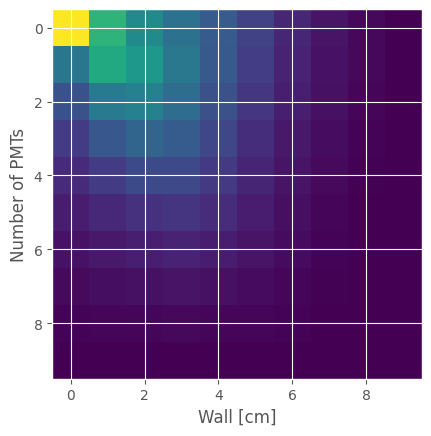

In [7]:
### heatmap ###
heatmap, _, _ = np.histogram2d(wall, num_pmt)

plt.imshow(heatmap)
plt.xlabel('Wall [cm]')
plt.ylabel('Number of PMTs')
#plt.xlim(0,4000) 

# flips the axis

plt.show()

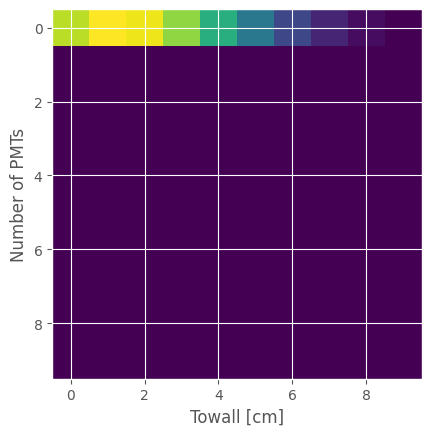

In [8]:
### heatmap ###
heatmap, _, _ = np.histogram2d(towall, num_pmt, bins=1000)

plt.clf()
plt.imshow(heatmap)
plt.xlabel('Towall [cm]')
plt.ylabel('Number of PMTs')
#plt.xlim(0,4000) 

plt.show()

In [ ]:
ax = fig.add_subplot(133, title='NonUniformImage: interpolated',
        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
im = NonUniformImage(ax, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
ax.add_image(im)
plt.show()

In [10]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

sns.set_style('darkgrid')
sns.scatterplot(x=towall, y=num_pmt, ax=ax1)
sns.histplot(x=towall, y=num_pmt, ax=ax2)
sns.kdeplot(x=towall, y=num_pmt, fill=True, ax=ax3)

ax1.set_title('scatterplot')
ax2.set_title('histplot')
ax3.set_title('kdeplot')
plt.tight_layout()
plt.show()

#### Individual Event Examples
Taking a quick look at events with to wall distance < 20 cm and number of PMTs < 100 to confirm they look like dark noise.